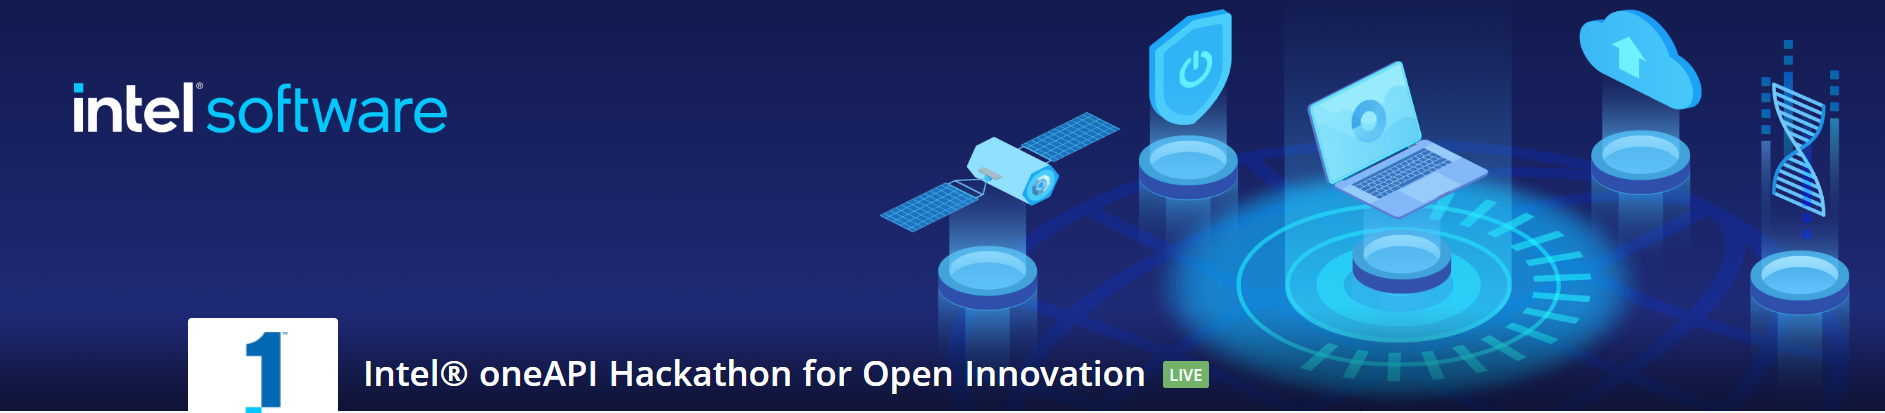

#Table of contents

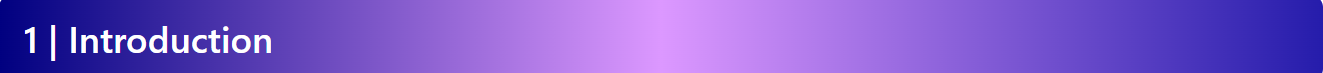

### Machine Learning (ML) Track of the Hackathon! 
### This  notebook will demonstrate how to optimize the training cycles, prediction throughput, and accuracy of Freshwater Prediction ML algorithm workflow using several accelerated python libraries within the Intel® AI Analytics Toolkit (AI Kit).

#### The main libraries we'll be working with in this notebook are:

- Intel® Extension of Python
- Intel® Extension for Scikit-learn
- XGBoost Optimized for Intel® Architecture

### Importing All the Libraries

In [6]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

     ---------------------------------------- 74.0/74.0 MB 7.3 MB/s eta 0:00:00
     -------------------------------------- 47.0/47.0 kB 391.5 kB/s eta 0:00:00


In [60]:
conda config --add channels intel


Note: you may need to restart the kernel to use updated packages.


### Usage of Intel Distribution Of Python from OneAPI Analytics Toolkit

In [61]:
conda install intelpython3_full

^C

Note: you may need to restart the kernel to use updated packages.


### Import Required Libraries 

In [8]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

### Usage of XG Boost , LightGBM , CatBoost Libraries from Analytics Toolkit  

#### Loading the Dataset

In [9]:
data = pd.read_csv(r'C:\Users\User\Downloads\dataset.csv', index_col = 0)

In [10]:
data.head(5)

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
Index,,,,,,,,,,,,,,,,,,,,,
0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,0.144599,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,0.239451,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


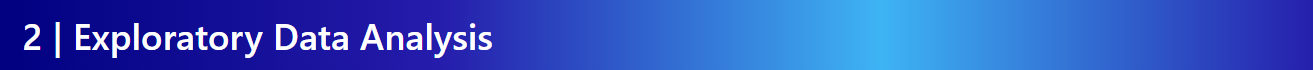

#### In this step of the workflow, we'll explore:

- Checking for missing values and duplicates in the dataset.
- Descriptive statistics of the dataset, including the mean, min, max, standard deviation, skewness, and kurtosis.
- Univariate and bivariate distributions of the numerical features
- Correlations between the variables in the dataset.

## Data Cleaning

In [11]:
data.describe()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,5.840788e+06,5.917089e+06,5.851117e+06,5.781311e+06,5.929933e+06,5.800716e+06,5.907027e+06,5.767686e+06,5.757440e+06,5.777951e+06,5.759424e+06,5.792981e+06,5.899017e+06,5.847259e+06,5.955172e+06,5.788609e+06,5.927114e+06,5.857239e+06,5.842323e+06,5.956842e+06
mean,7.445373e+00,1.279027e-01,6.169970e+00,1.842970e+02,1.498336e-03,1.550255e+00,5.215093e-01,9.644315e-01,5.161216e-01,1.803459e+00,1.460764e+02,4.249974e+02,3.255738e+00,1.092802e-01,2.671454e+02,1.912982e+01,6.000324e+01,1.573227e+01,1.150404e+01,3.030552e-01
std,8.881665e-01,4.799915e-01,3.256667e+00,6.842828e+01,3.250641e-02,1.546368e+00,9.258807e-01,8.247870e-01,5.965534e-01,1.069586e+00,6.879844e+01,1.899937e+02,7.328441e-01,4.761827e-01,1.558586e+02,1.136623e+01,1.809977e+01,8.794391e+00,6.922858e+00,4.595789e-01
min,1.057113e+00,2.047587e-53,2.861727e-01,2.363919e+01,0.000000e+00,1.482707e-08,1.029712e-16,4.550148e-06,2.982735e-10,1.100007e-02,1.194073e+01,1.059998e+01,9.019921e-01,4.793505e-55,1.048902e-02,6.661938e-01,-3.387091e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.894328e+00,9.992949e-06,3.973078e+00,1.381341e+02,1.500283e-122,4.148202e-01,3.872368e-02,3.749503e-01,1.288629e-01,8.921019e-01,9.777114e+01,2.864261e+02,2.744504e+00,2.522376e-06,1.329157e+02,1.134879e+01,4.779120e+01,8.000000e+00,6.000000e+00,0.000000e+00
50%,7.449564e+00,2.249640e-03,5.604051e+00,1.760178e+02,2.213625e-62,1.081818e+00,2.097680e-01,7.751792e-01,3.479592e-01,1.774284e+00,1.346489e+02,3.970808e+02,3.209748e+00,6.481943e-04,2.658880e+02,1.644428e+01,5.999681e+01,1.600000e+01,1.200000e+01,0.000000e+00
75%,8.014424e+00,5.455290e-02,7.672402e+00,2.179811e+02,3.592165e-27,2.230841e+00,6.249132e-01,1.341508e+00,7.010104e-01,2.654286e+00,1.817703e+02,5.333489e+02,3.705217e+00,1.672082e-02,3.984954e+02,2.383543e+01,7.221235e+01,2.300000e+01,1.800000e+01,1.000000e+00
max,1.291072e+01,1.935315e+01,9.639078e+01,1.507310e+03,5.844281e+00,2.836867e+01,2.371527e+01,1.464625e+01,1.207482e+01,4.141998e+00,1.434587e+03,2.271632e+03,1.256663e+01,2.374086e+01,5.797999e+02,2.973086e+02,1.521237e+02,3.100000e+01,2.300000e+01,1.000000e+00


In [12]:
data.isna().sum()

pH                        116054
Iron                       39753
Nitrate                   105725
Chloride                  175531
Lead                       26909
Zinc                      156126
Color                       5739
Turbidity                  49815
Fluoride                  189156
Copper                    199402
Odor                      178891
Sulfate                   197418
Conductivity              163861
Chlorine                   57825
Manganese                 109583
Total Dissolved Solids      1670
Source                     88262
Water Temperature         168233
Air Temperature            29728
Month                      95668
Day                        99603
Time of Day               114519
Target                         0
dtype: int64

#### Filling all the Null Values Using Forward Fill Method

In [13]:
data.fillna(method='ffill', inplace=True)

#### Converting all the Columns of String Data Type to Integer Type Using Factorization Method

In [14]:
df_numeric = data.select_dtypes(exclude=['object'])
df_obj = data.select_dtypes(include=['object']).copy()
    
for c in df_obj:
    df_obj[c] = pd.factorize(df_obj[c])[0]

data = pd.concat([df_obj,df_numeric], axis=1)

In [57]:
data.head(10)

,Color,Source,Month,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,...,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
Index,,,,,,,,,,,,,,,,,,,,,
0,0,-1,0,8.332988,8.347252e-05,8.605777,122.799772,3.713298e-52,3.434827,0.022683,...,87.266538,471.683357,3.708178,2.269945e-15,332.118789,NaN,43.493324,29.0,4.0,0
1,1,0,1,6.917863,8.053827e-05,3.734167,227.029851,7.849262e-94,1.245317,0.019007,...,144.010981,432.844908,3.292038,8.024076e-07,284.641984,15.348981,71.220586,26.0,16.0,0
2,2,1,0,5.443762,2.010586e-02,3.816994,230.995630,5.286616e-76,0.528280,0.319956,...,275.702107,990.201209,3.560224,7.007989e-02,570.054094,11.643467,44.891330,31.0,8.0,0
3,3,2,2,7.955339,1.439878e-01,8.224944,178.129940,3.997118e-176,4.027879,0.166319,...,147.163233,237.028467,3.516907,2.468295e-02,100.043838,10.092392,60.843233,1.0,21.0,0
4,2,3,3,8.091909,2.167128e-03,9.925788,186.540872,4.171069e-132,3.807511,0.004867,...,175.275175,385.025855,3.177849,3.296139e-03,168.075545,15.249416,69.336671,29.0,7.0,0
5,3,4,4,8.091909,6.438211e-06,1.702584,162.828458,6.102202e-23,3.742464,0.504791,...,40.853403,273.359662,3.957842,2.863952e-04,365.639045,13.966842,45.444798,18.0,16.0,0
6,2,5,5,8.132455,5.526229e-02,4.288010,94.993978,2.919909e-52,1.770221,0.021703,...,40.853403,265.530096,1.706755,3.083768e-02,266.079565,27.920380,68.104498,14.0,13.0,0
7,0,1,2,7.258203,6.107130e-09,9.261676,182.242341,4.399852e-224,0.416478,0.047803,...,114.551427,160.062557,2.325094,6.020680e-16,214.553104,15.891905,61.139140,11.0,4.0,0
8,3,3,0,8.238149,8.084497e-10,3.192381,143.222718,1.840021e-57,0.134371,0.662611,...,118.541279,201.769551,3.798676,3.508666e-02,436.317937,69.943048,92.420381,5.0,14.0,0


#### Agility of the model to expand and accomodate large datasets

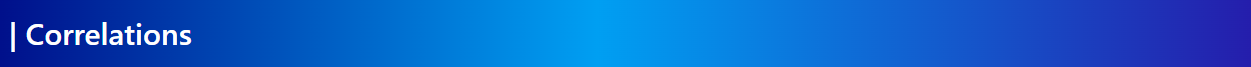

#### Correlation Matrix

In [15]:
data.corr(method='pearson').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Color,Source,Month,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
Color,1.0,0.000479,-0.000313,-0.00791,0.0425,0.0417,0.0514,0.00984,0.0205,0.0564,0.0422,0.0535,0.0406,0.0316,-4.98e-05,0.0369,0.0465,0.0233,-0.000909,-0.000538,0.000675,-6.49e-06,0.147
Source,0.000479,1.0,-1.23e-05,0.000656,0.000114,0.000529,0.000452,0.000471,2.02e-05,-0.000231,0.000387,0.000304,-0.000173,-0.000307,6.98e-05,0.000541,-0.000126,0.000459,-0.000106,0.000491,0.000393,0.000362,-4.74e-05
Month,-0.000313,-1.23e-05,1.0,-0.000285,-0.000142,0.000123,8.18e-05,0.00021,-0.000125,-0.000425,0.000147,0.000215,0.000335,0.000173,0.000414,0.000908,-0.000388,-0.000138,0.000282,0.000392,-0.00596,0.000222,-3.96e-05
pH,-0.00791,0.000656,-0.000285,1.0,-0.00978,-0.00946,-0.0124,-0.00232,-0.00502,-0.0136,-0.0101,-0.0133,-0.0094,-0.00713,0.000353,-0.00774,-0.0111,-0.00522,-0.000399,0.000521,0.000843,-0.000113,-0.0347
Iron,0.0425,0.000114,-0.000142,-0.00978,1.0,0.0516,0.0637,0.0109,0.0252,0.0694,0.0519,0.0673,0.0497,0.0404,0.000269,0.045,0.0588,0.0284,0.000868,-0.000391,-9.22e-05,0.000339,0.181
Nitrate,0.0417,0.000529,0.000123,-0.00946,0.0516,1.0,0.0637,0.0114,0.0249,0.0703,0.052,0.0666,0.0494,0.0392,0.000164,0.0452,0.0581,0.029,-0.00013,0.000261,-6.66e-05,-4.43e-05,0.183
Chloride,0.0514,0.000452,8.18e-05,-0.0124,0.0637,0.0637,1.0,0.0139,0.0303,0.0854,0.0636,0.0808,0.0613,0.0477,-0.000539,0.055,0.0701,0.036,-0.000325,-0.000247,0.000135,-0.000273,0.223
Lead,0.00984,0.000471,0.00021,-0.00232,0.0109,0.0114,0.0139,1.0,0.00582,0.0165,0.0131,0.0153,0.0113,0.00912,-0.000103,0.0105,0.0135,0.00585,-0.000107,-0.000485,0.000188,0.000586,0.042
Zinc,0.0205,2.02e-05,-0.000125,-0.00502,0.0252,0.0249,0.0303,0.00582,1.0,0.0338,0.0243,0.0323,0.0245,0.0192,-3.83e-05,0.0217,0.0272,0.0138,-0.000402,2.85e-05,0.000218,0.000659,0.0884
Turbidity,0.0564,-0.000231,-0.000425,-0.0136,0.0694,0.0703,0.0854,0.0165,0.0338,1.0,0.0693,0.0887,0.0663,0.0525,5.3e-05,0.062,0.0764,0.0389,0.000241,-0.000864,-0.000268,-0.00102,0.245


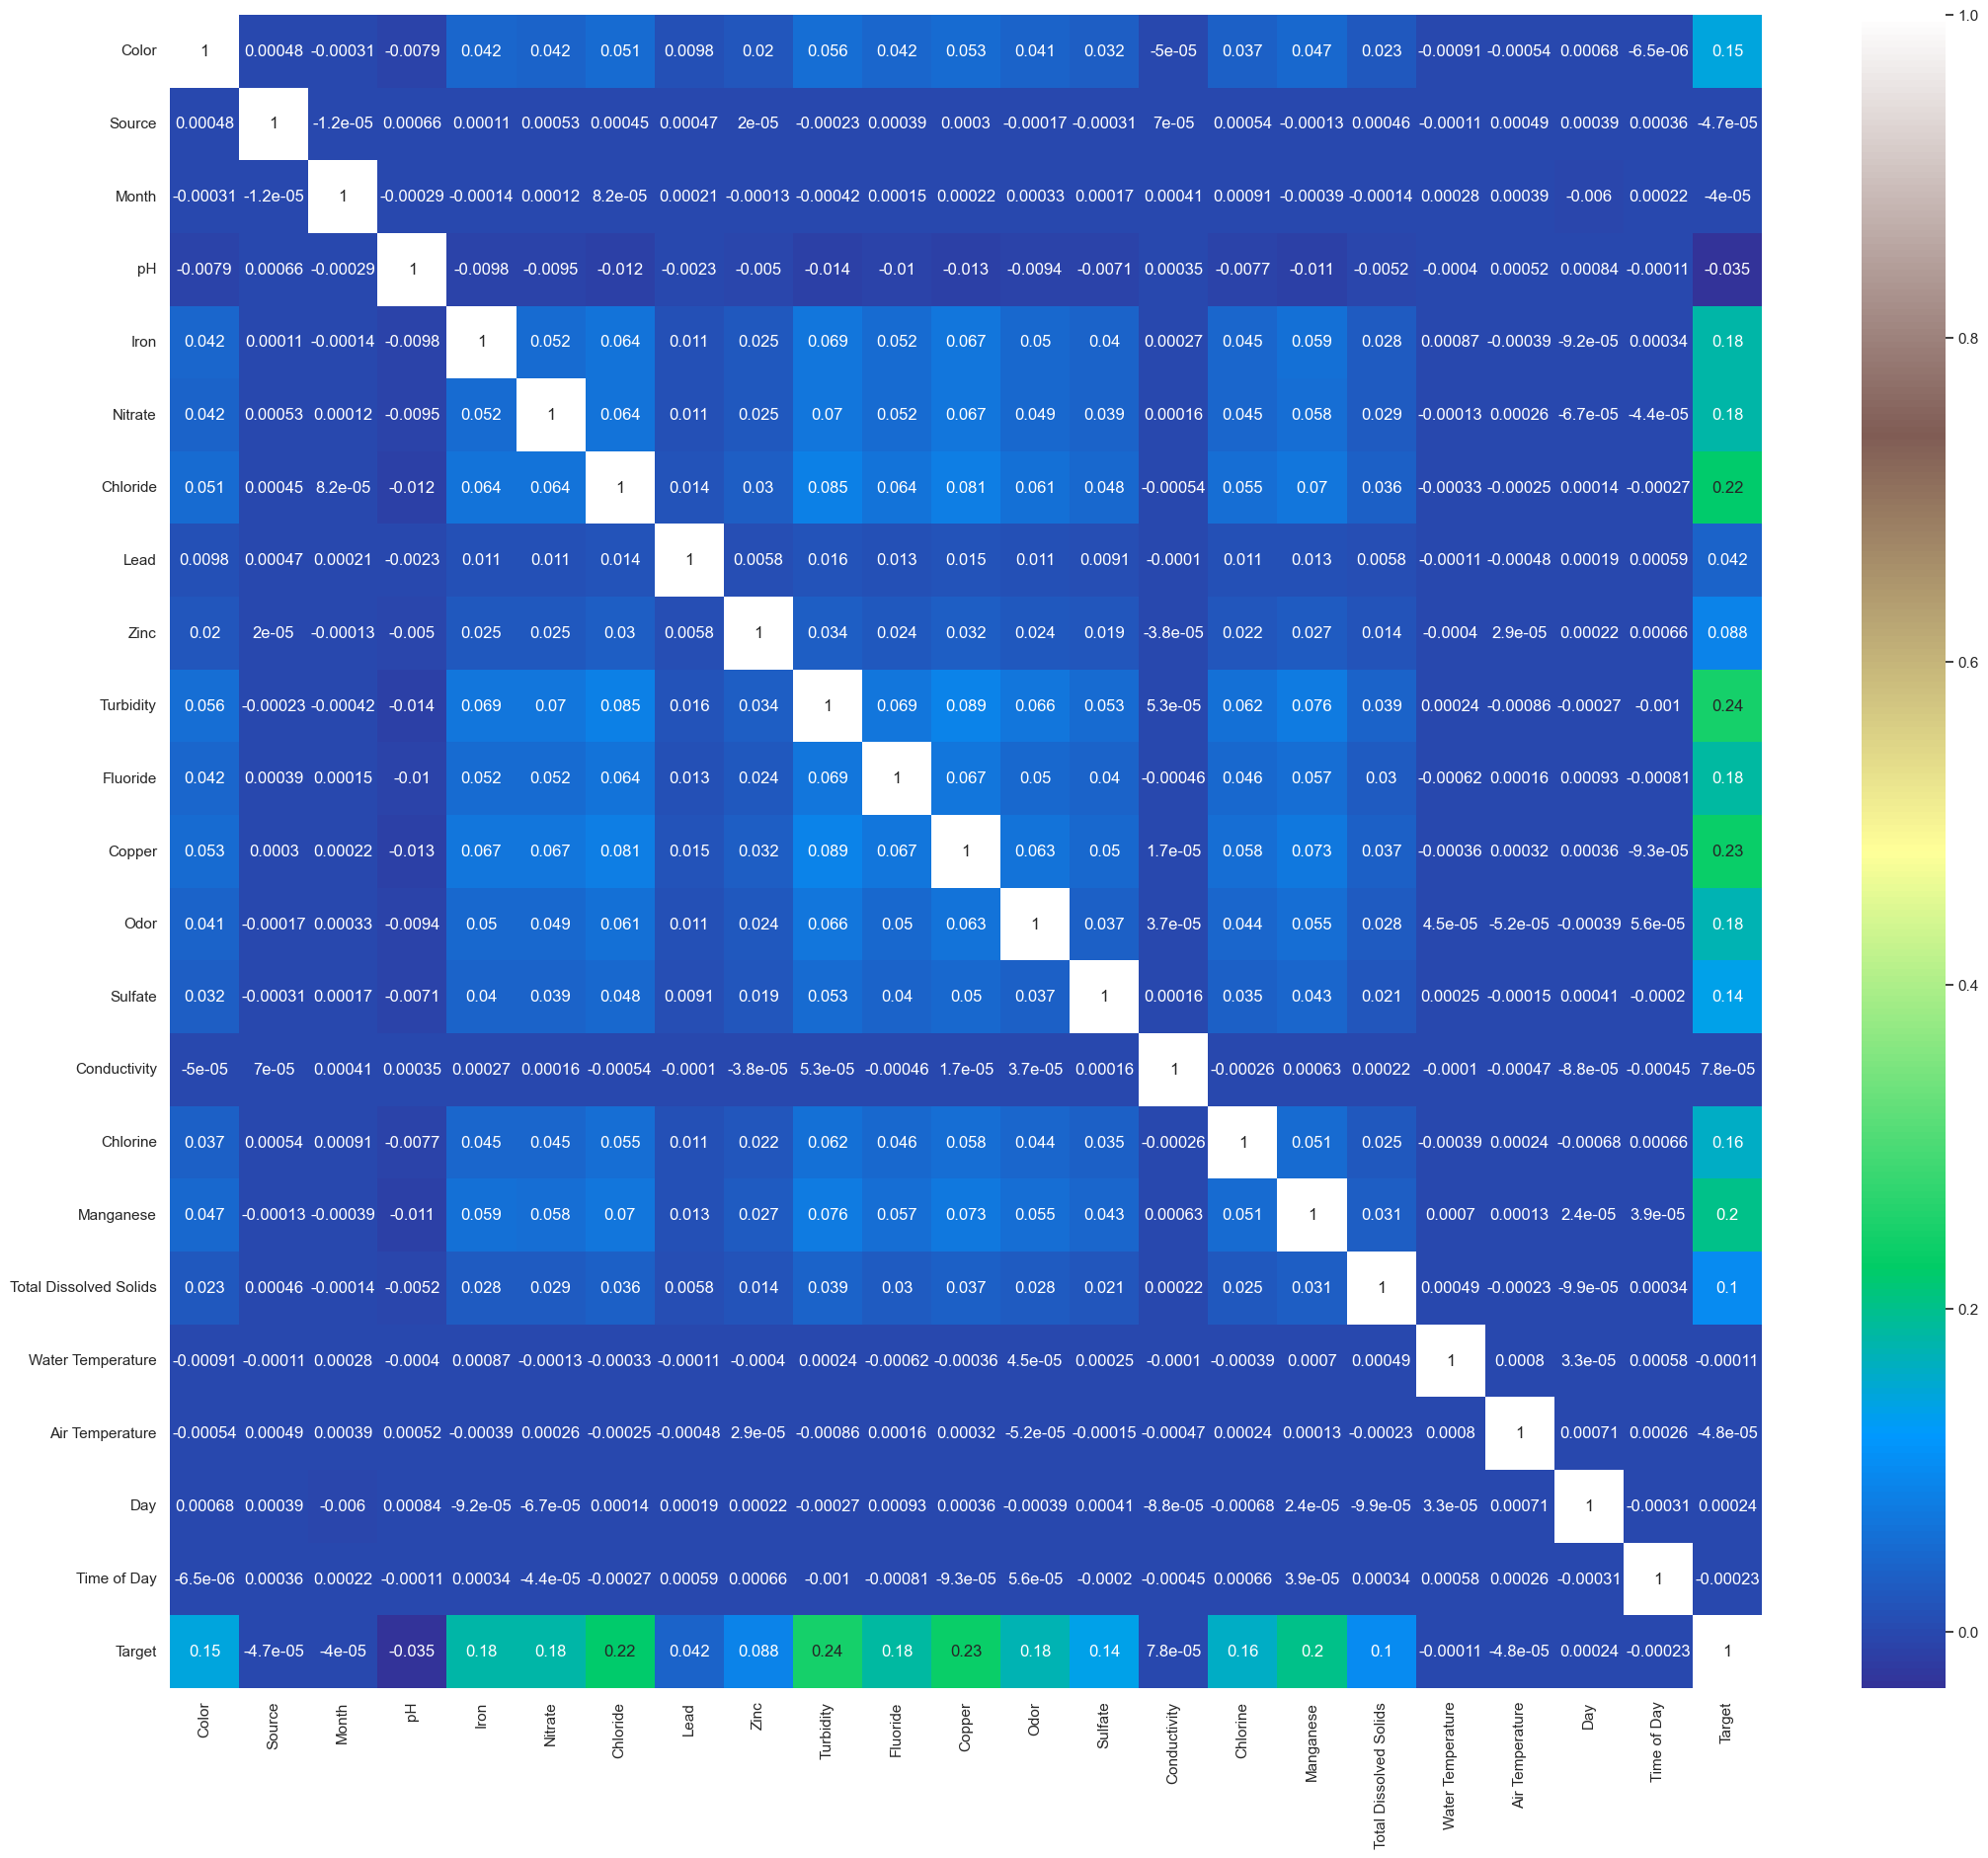

In [64]:
plt.figure(figsize=(26,22))
sns.heatmap(data.corr(),annot=True,cmap='terrain')
plt.show()

In [16]:
df_correlation = data.corr()

<AxesSubplot:>

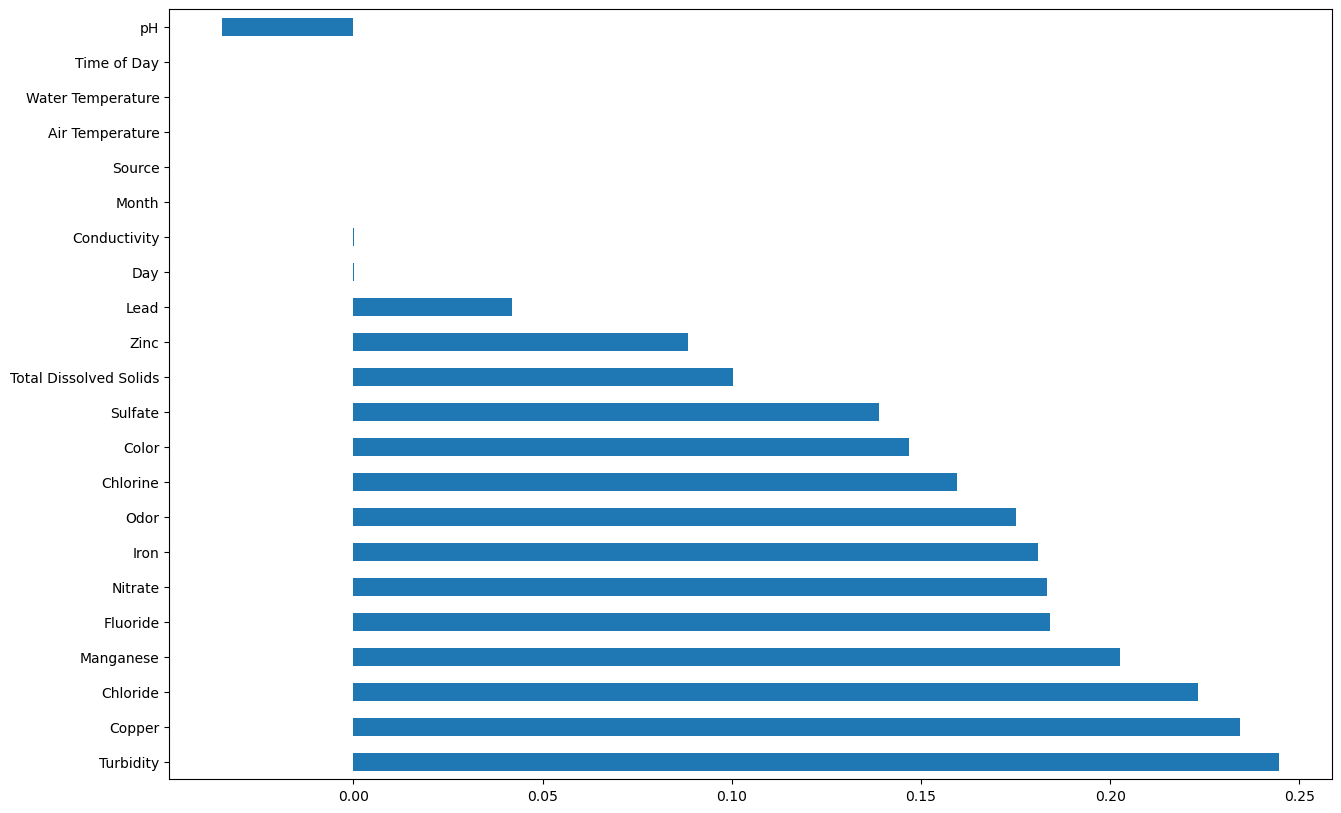

In [17]:
plt.rcParams['figure.figsize'] = [15, 10]
(df_correlation
     .Target
     .drop('Target') 
     .sort_values(ascending=False)
     .plot
     .barh())

In [18]:
data.corr()['Target'].sort_values()

pH                       -0.034737
Time of Day              -0.000232
Water Temperature        -0.000113
Air Temperature          -0.000048
Source                   -0.000047
Month                    -0.000040
Conductivity              0.000078
Day                       0.000241
Lead                      0.042007
Zinc                      0.088429
Total Dissolved Solids    0.100231
Sulfate                   0.138839
Color                     0.146770
Chlorine                  0.159533
Odor                      0.175152
Iron                      0.180897
Nitrate                   0.183399
Fluoride                  0.184089
Manganese                 0.202702
Chloride                  0.223133
Copper                    0.234398
Turbidity                 0.244534
Target                    1.000000
Name: Target, dtype: float64

In [19]:
cor = data.corr()['Target'].sort_values()

In [20]:
df = data.copy()

#### Removing all the Columns from the Dataset whose Correlation Value is Less than 0.01 with the Target Column

In [21]:
arr = []
for k, v in cor.items():
    if abs(v) < 0.01:
        arr.append(k)

In [22]:
df = df.drop(arr, axis=1)

In [23]:
df.head(5)

,Color,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Target
Index,,,,,,,,,,,,,,,,
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0.022683,0.607283,0.144599,1.626212,87.266538,3.708178,2.269945e-15,332.118789,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,0.019007,0.622874,0.437835,1.686049,144.010981,3.292038,8.024076e-07,284.641984,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,0.319956,0.423423,0.431588,3.414619,275.702107,3.560224,7.007989e-02,570.054094,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,0.166319,0.208454,0.239451,3.414619,147.163233,3.516907,2.468295e-02,100.043838,0
4,2,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,0.004867,0.222912,0.616574,0.795310,175.275175,3.177849,3.296139e-03,168.075545,0


### BoxPlot ( Pictorial View of all the Outliers in the Data )

<AxesSubplot:>

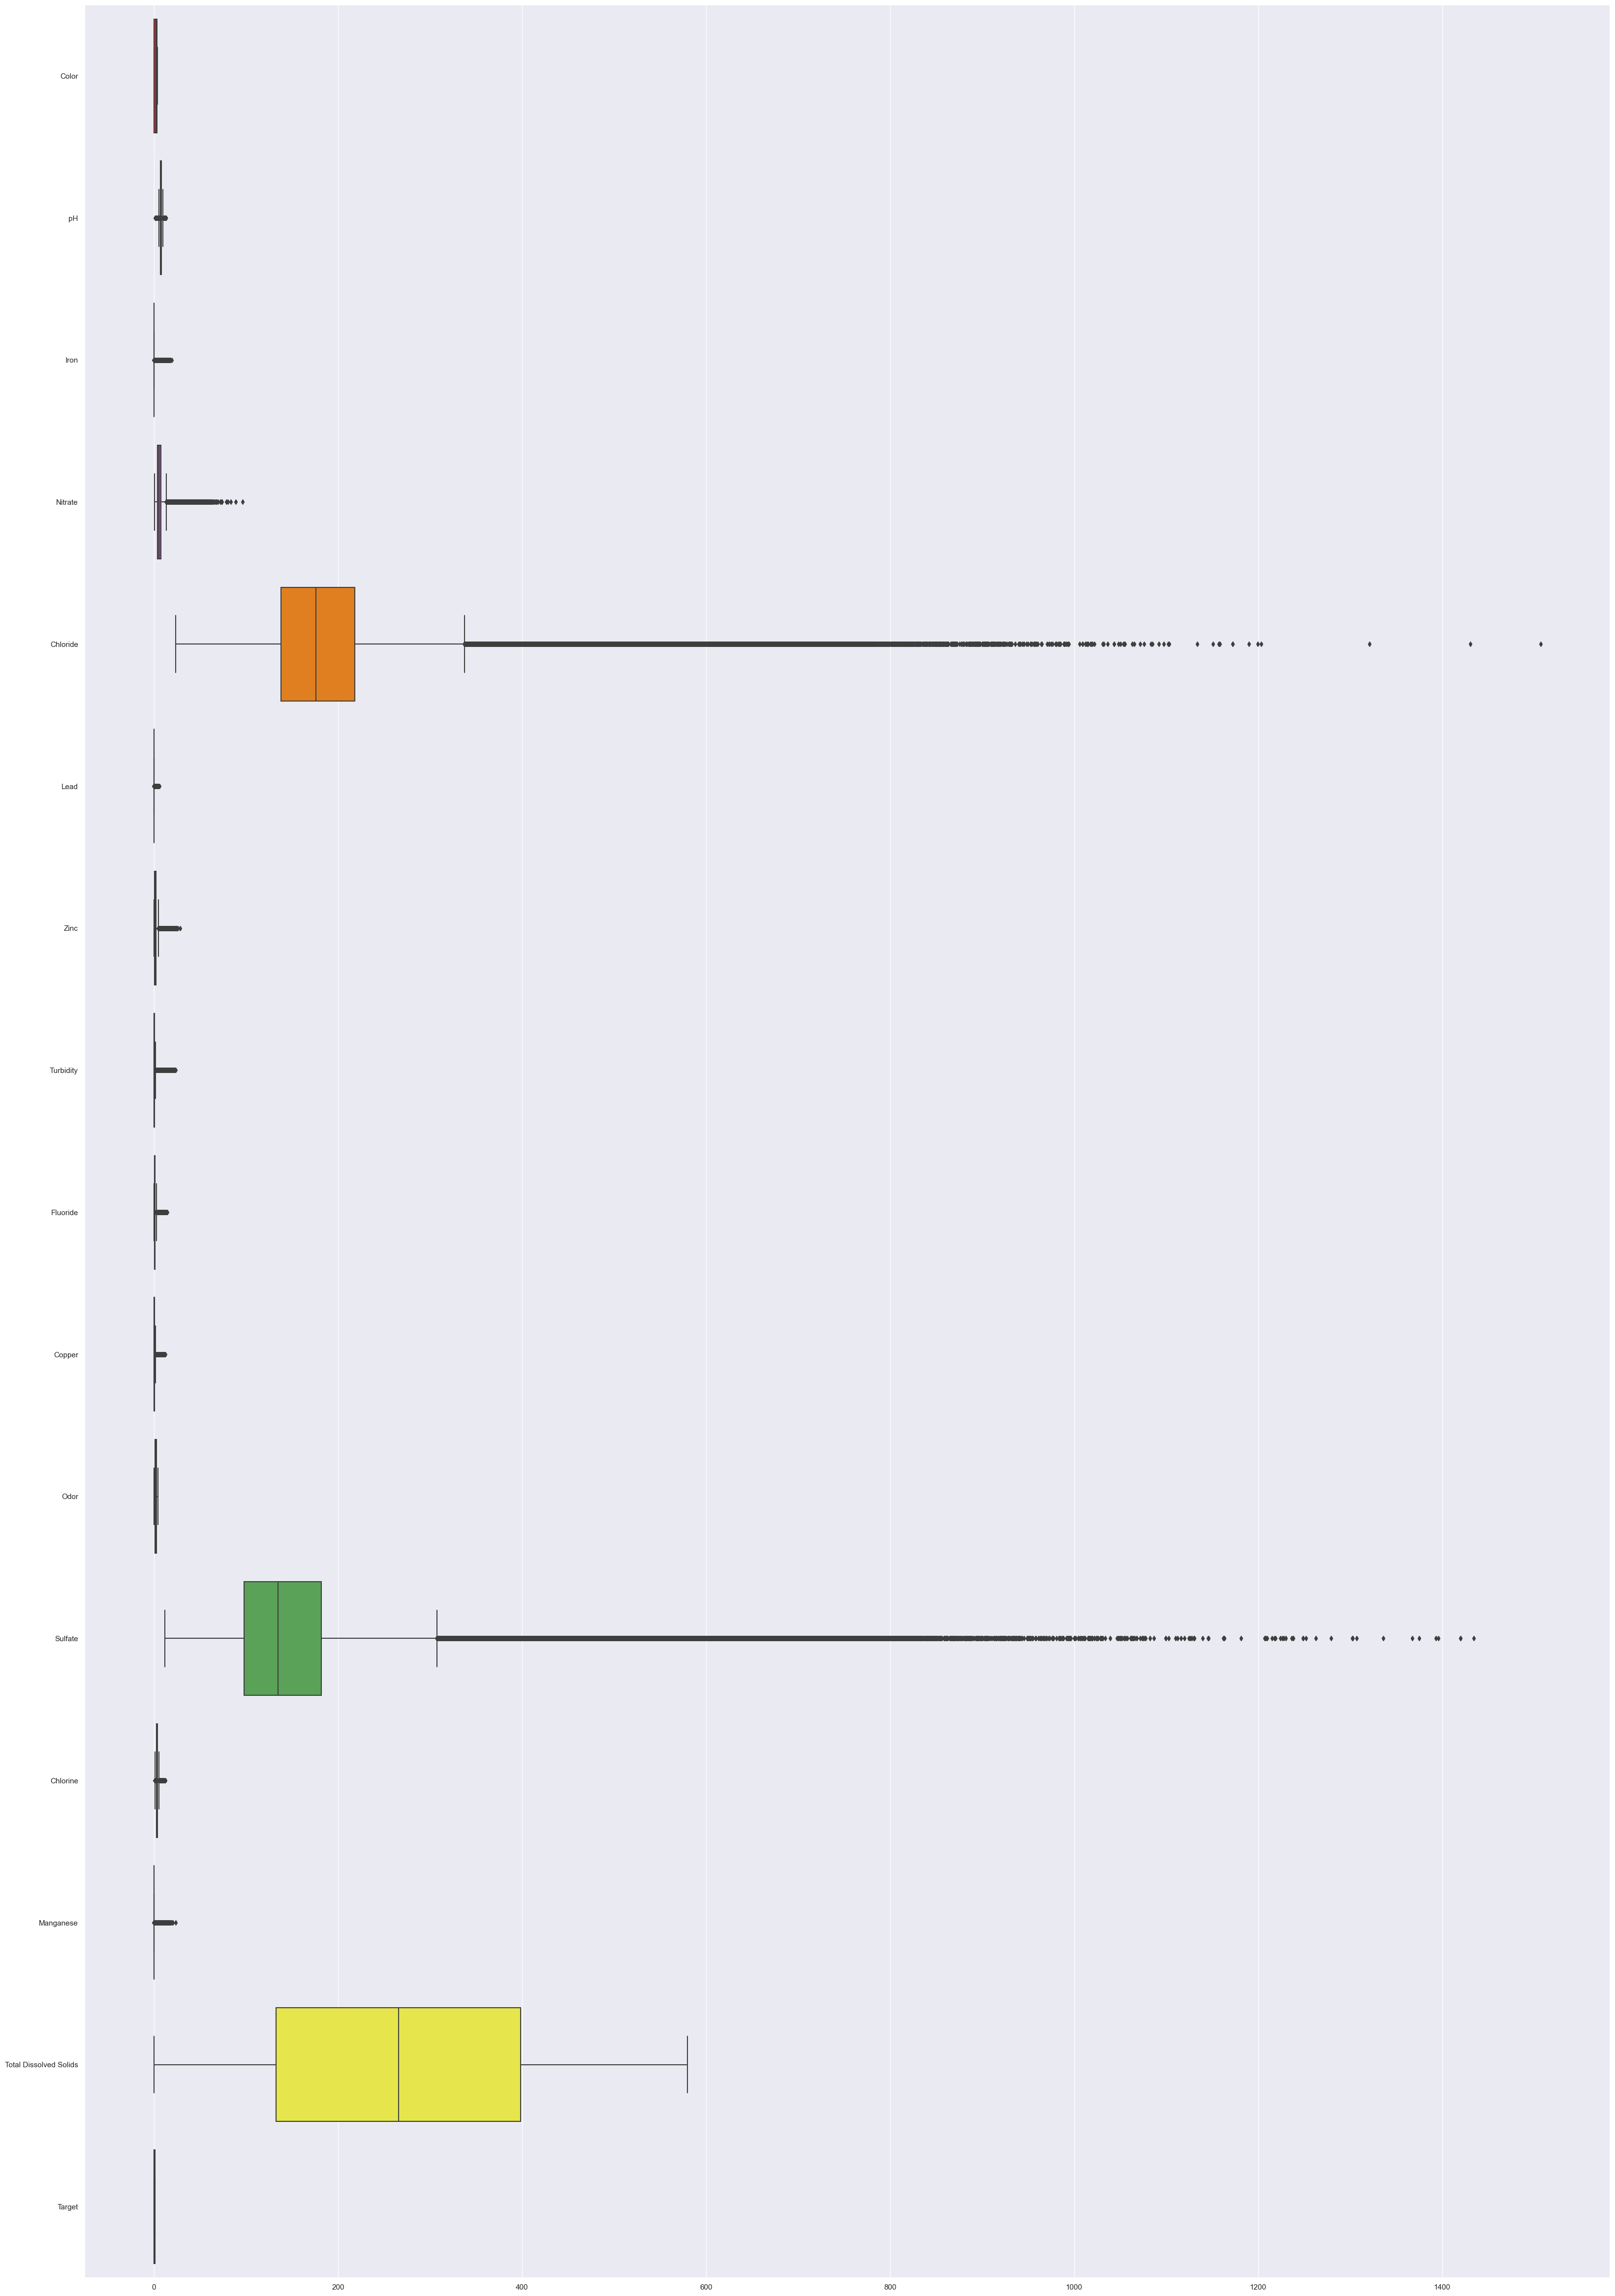

In [24]:
sns.set(rc={'figure.figsize':(40,60)})
sns.boxplot(data=df, orient="h", palette="Set1")

#### Removing all the Outliers from the Dataset

In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [26]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Color                           0
pH                         157706
Iron                       955610
Nitrate                    196950
Chloride                   193937
Lead                      1468591
Zinc                       184256
Turbidity                  464338
Fluoride                   207346
Copper                     318721
Odor                            0
Sulfate                    151300
Chlorine                   101584
Manganese                  954536
Total Dissolved Solids          0
Target                          0
dtype: int64

In [27]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(2698298, 16)

In [28]:
data.shape

(5956842, 23)

In [29]:
df.head(5)

,Color,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Target
Index,,,,,,,,,,,,,,,,
0,0,8.332988,8.347252e-05,8.605777,122.799772,3.713298e-52,3.434827,0.022683,0.607283,0.144599,1.626212,87.266538,3.708178,2.269945e-15,332.118789,0
1,1,6.917863,8.053827e-05,3.734167,227.029851,7.849262e-94,1.245317,0.019007,0.622874,0.437835,1.686049,144.010981,3.292038,8.024076e-07,284.641984,0
4,2,8.091909,2.167128e-03,9.925788,186.540872,4.171069e-132,3.807511,0.004867,0.222912,0.616574,0.795310,175.275175,3.177849,3.296139e-03,168.075545,0
6,2,8.132455,5.526229e-02,4.288010,94.993978,2.919909e-52,1.770221,0.021703,1.111893,0.247116,0.426404,40.853403,1.706755,3.083768e-02,266.079565,0
7,0,7.258203,6.107130e-09,9.261676,182.242341,4.399852e-224,0.416478,0.047803,1.016196,0.298093,3.144199,114.551427,2.325094,6.020680e-16,214.553104,0


In [30]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Standardizing the Dataset 

In [31]:
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

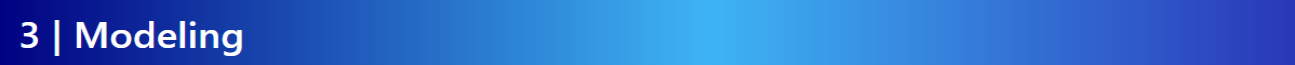

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#### In this section, we will explore different Machine Learning models to predict for the quality. 

#### With binary classification tasks, there are many different models to choose from. 
##### Some of the models that we use here are;
- Logistic Regression

##### Ensemble methods like;
- GradientBoost , 
- XGBoost , 
- LightGBM and 
- CatBoost.

#### Further we will compare the five models.

### Logistic Regression

In [33]:
regressor = LogisticRegression()
regressor.fit(x_train, y_train)

LogisticRegression()

In [34]:
pred = regressor.predict(x_test)

In [35]:
accuracy = regressor.score(x_test, y_test)
print(f'Accuracy of Logistic Regression Model is {round(accuracy * 100, 2)} %')

Accuracy of Logistic Regression Model is 90.47 %


### Gradient Boost

In [36]:
reg = GradientBoostingClassifier()

In [37]:
reg.fit(x_train, y_train)

GradientBoostingClassifier()

In [38]:
pred = reg.predict(x_test)

In [39]:
accuracy = reg.score(x_test, y_test)
print(f'Accuracy of Gradient Boost Model is {round(accuracy * 100, 2)} %')

Accuracy of Gradient Boost Model is 93.92 %


### XG Boost

In [40]:
model = XGBClassifier()

In [41]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [42]:
pred = model.predict(x_test)

In [43]:
accuracy = model.score(x_test, y_test)
print(f'Accuracy of XG Boost Model is {round(accuracy * 100, 2)} %')

Accuracy of XG Boost Model is 94.72 %


### LightGBM

In [44]:
model_lgbm = LGBMClassifier()

In [45]:
model_lgbm.fit(x_train, y_train)

LGBMClassifier()

In [46]:
pred_new = model_lgbm.predict(x_test)

In [47]:
accuracy = model_lgbm.score(x_test, y_test)
print(f'Accuracy of Light Gradient Boost Model is {round(accuracy * 100, 2)} %')

Accuracy of Light Gradient Boost Model is 95.0 %


### CatBoost

In [48]:
model_cat = CatBoostClassifier(verbose=0, n_estimators=100)

In [49]:
model_cat.fit(x_train, y_train)

In [50]:
predictions = model_cat.predict(x_test)

In [51]:
accuracy = model_cat.score(x_test, y_test)
print(f'Accuracy of Light Gradient Boost Model is {round(accuracy * 100, 2)} %')

Accuracy of Light Gradient Boost Model is 94.79 %


### Run Below Four Cells to get the Accuracy from the Final Selected Model

In [52]:
def preprocessing(dataset_path):
    
    data = pd.read_csv(dataset_path , index_col = [0])
    data.fillna(method='ffill', inplace=True)
    
    df_numeric = data.select_dtypes(exclude=['object'])
    df_obj = data.select_dtypes(include=['object']).copy()
    
    for c in df_obj:
        df_obj[c] = pd.factorize(df_obj[c])[0]

    data = pd.concat([df_obj,df_numeric], axis=1)
    
    cor = data.corr()['Target'].sort_values()
    df = data.copy()
    arr = []
    for k, v in cor.items():
        if abs(v) < 0.01:
            arr.append(k)
    df = df.drop(arr, axis=1)
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    x = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    sc_X = StandardScaler()
    x = sc_X.fit_transform(x)
    
    return x, y

In [53]:
x, y = preprocessing(r'C:\Users\User\Downloads\dataset.csv')

In [54]:
def training(x, y):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    model = LGBMClassifier()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)
    return round(accuracy * 100, 4)

In [55]:
print(f'Accuracy of the Model is {training(x, y)} %')

Accuracy of the Model is 95.003 %
